In [22]:
from poloniex import Poloniex
polo = Poloniex()
import os, datetime
import matplotlib.pyplot as plt
%matplotlib inline
#import plotly_express as px

#input date time and Symbol
startdate = '1/11/2010'
end_date= '31/12/2018'
Symbol = 'USDT_BTC'

#Set the time period to use. time categories: 7200, 14400, and 86400(daily).
timeperiod = 7200

#set the moving averages to use. MA = Simple Moving Average and EMA = Exponential Moving Average
MA1 = 10
MA2 = 50
EMA1 = 10
EMA2 = 50


#pull HISTORICAL DATA
#86400 denotes daily
import pandas as pd
Daily_data =polo.returnChartData(Symbol, timeperiod, start= datetime.datetime.strptime(startdate, "%d/%m/%Y").timestamp(), end= datetime.datetime.strptime(end_date, "%d/%m/%Y").timestamp())
Daily_data = pd.DataFrame(Daily_data)
Daily_data['True Date']= pd.to_datetime(Daily_data['date'], unit='s')
Daily_data['Year']=  Daily_data['True Date'].dt.year

#moving average columns
Daily_data['MA'+str(MA1)] = Daily_data['close'].rolling(MA1).mean()
Daily_data['MA'+str(MA2)] = Daily_data['close'].rolling(MA2).mean()
Daily_data['EMA'+str(EMA1)] = Daily_data['close'].ewm(span = 10).mean()
Daily_data['EMA'+str(EMA2)] = Daily_data['close'].ewm(span = 50).mean()
#Rules
#Signal cross of 10 over 50 Buy at close price Logic 10>50 or short 10<50
#Always gong to be long or short
#Use closing prices
#Profit/Loss -- For buy (10>50) profit = close on day of cross until until 10<50 Reversal.
#Profit/Loss -- For Sell this is the reverse
#charts: Line chart, sma's and closing price
#profit LOSS calculator

Daily_data.head(2)

,close,date,high,low,open,quoteVolume,volume,weightedAverage,True Date,Year,MA10,MA50,EMA10,EMA50
0,225.0,1424368800,225.0,225.0,225.0,0.004444,0.999999,225.000000,2015-02-19 18:00:00,2015,NaN,NaN,225.00,225.00
1,244.0,1424376000,244.0,225.0,225.0,0.188671,45.275877,239.972316,2015-02-19 20:00:00,2015,NaN,NaN,235.45,234.69


In [23]:
#drop the Nan to get to the start of the moving averages
Daily_data_SMA= Daily_data.dropna()
Daily_data_SMA

,close,date,high,low,open,quoteVolume,volume,weightedAverage,True Date,Year,MA10,MA50,EMA10,EMA50
49,235.000026,1424721600,235.000026,235.000026,235.000026,0.000000,0.000000,235.000026,2015-02-23 20:00:00,2015,235.000021,240.295046,235.603651,239.127936
50,235.000000,1424728800,235.000000,235.000000,235.000000,0.011818,2.777235,235.000000,2015-02-23 22:00:00,2015,235.000021,240.495046,235.493892,238.941868
51,235.000000,1424736000,235.000000,235.000000,235.000000,0.003995,0.938762,235.000000,2015-02-24 00:00:00,2015,235.000021,240.315046,235.404091,238.765223
52,235.000000,1424743200,235.000000,235.000000,235.000000,0.000000,0.000000,235.000000,2015-02-24 02:00:00,2015,235.000018,240.135046,235.330618,238.597433
53,235.000000,1424750400,235.000000,235.000000,235.000000,0.000000,0.000000,235.000000,2015-02-24 04:00:00,2015,235.000016,239.955046,235.270505,238.437973
54,235.000000,1424757600,235.000000,235.000000,235.000000,0.000000,0.000000,235.000000,2015-02-24 06:00:00,2015,235.000013,239.775046,235.221321,238.286355
55,235.000000,1424764800,235.000000,235.000000,235.000000,0.000000,0.000000,235.000000,2015-02-24 08:00:00,2015,235.000010,239.595046,235.181080,238.142129
56,235.000000,1424772000,235.000000,235.000000,235.000000,0.000000,0.000000,235.000000,2015-02-24 10:00:00,2015,235.000008,239.490044,235.148156,238.004874
57,238.000038,1424779200,238.000038,238.000038,238.000038,0.070491,16.776813,238.000038,2015-02-24 12:00:00,2015,235.300009,239.350045,235.666685,238.004663
58,238.000038,1424786400,238.000038,238.000038,238.000038,0.000000,0.000000,238.000038,2015-02-24 14:00:00,2015,235.600010,239.305046,236.090934,238.004463


In [24]:
#create the long/short column:
def buy_sell (row):
   if row['MA10'] > row['MA50'] :
      return 'LONG'
   if row['MA10'] < row['MA50'] :
      return 'SHORT'    
longshort = Daily_data.apply (lambda row: buy_sell(row), axis=1)
Daily_data_SMA['Go Long or Short'] = longshort


C:\Users\jthor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
#Find where the column values change
#this function compares current value to previous value and if they are the same = True
#If current value does not equal then it is false.
#Therefore all the "false" tags will have an exit price for our long and a entry price for our short
Daily_data_SMA['SMA entry and exit'] = Daily_data_SMA['Go Long or Short'].eq(Daily_data_SMA['Go Long or Short'].shift())
Daily_data_SMA.to_csv('SMA.csv')

C:\Users\jthor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [26]:
#Lets pull out all the entry and exit points with closing price and Short or long column
EntryandExit = Daily_data_SMA.loc[Daily_data_SMA['SMA entry and exit'] == False]
EntryandExit
#NEXT Calculate the profit/Loss per trade
#Step 1 Change all the rows named SHORT to Negative
EntryandExit.loc[EntryandExit['Go Long or Short'] == 'LONG', 'close'] = EntryandExit['close']*-1
#Calculate the profit or loss on the trades. Fist column will be nan after that the profit or 
#loss is calculated on a per trade basis

#EntryandExit['Running Total'] = EntryandExit['Profit or Loss'].cumsum()
EntryandExit['SMA Profit or Loss'] =  EntryandExit.close+EntryandExit.close.shift(1) 
#Cumulative Profit or loss
EntryandExit['SMA Cumulative Profit or Loss'] =  EntryandExit['SMA Profit or Loss'].cumsum()

EntryandExit.head(4)

C:\Users\jthor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jthor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,close,date,high,low,open,quoteVolume,volume,weightedAverage,True Date,Year,MA10,MA50,EMA10,EMA50,Go Long or Short,SMA entry and exit,SMA Profit or Loss,SMA Cumulative Profit or Loss
49,235.000026,1424721600,235.000026,235.000026,235.000026,0.000000,0.000000,235.000026,2015-02-23 20:00:00,2015,235.000021,240.295046,235.603651,239.127936,SHORT,False,NaN,NaN
70,-237.750000,1424872800,237.750000,237.750000,237.750000,0.000000,0.000000,237.750000,2015-02-25 14:00:00,2015,238.975004,238.960048,238.386091,238.324387,LONG,False,-2.749974,-2.749974
72,237.750000,1424887200,237.750000,237.750000,237.750000,0.000000,0.000000,237.750000,2015-02-25 18:00:00,2015,238.750000,238.860048,238.175813,238.277703,SHORT,False,0.000000,-2.749974
80,-237.750000,1424944800,237.750000,237.750000,237.750000,0.000013,0.003053,237.750000,2015-02-26 10:00:00,2015,237.750000,237.555048,237.835510,238.127286,LONG,False,0.000000,-2.749974


In [27]:
#trade statistics
total_trades= len(EntryandExit)
Total_profit_points = EntryandExit['SMA Profit or Loss'].sum()
largest_drawdown = EntryandExit['SMA Profit or Loss'].min()
largest_winner = EntryandExit['SMA Profit or Loss'].max()

print(f"There were {total_trades} trades made for the Simple Moving Average Strategy. The Total Profit/Loss from the \
strategy was ${round(Total_profit_points,2)}. The largest single winner was ${round(largest_winner,2)} and the largest drawdown was ${round(largest_drawdown,2)}")

There were 458 trades made for the Simple Moving Average Strategy. The Total Profit/Loss from the strategy was $19680.73. The largest single winner was $4162.09 and the largest drawdown was $-3347.0


In [28]:
#Group by to get profit or loss per year
profit_by_year = EntryandExit[['Year','SMA Profit or Loss']]
profit_by_year.groupby(['Year']).sum()
#df1 = df[['a','b']]
#EntryandExit.groupby(['Year','SMA Cumulative Profit or Loss'])
#profit_by_year.sum()

,SMA Profit or Loss
Year,
2015,-406.369273
2016,281.266983
2017,8696.770391
2018,11109.065362


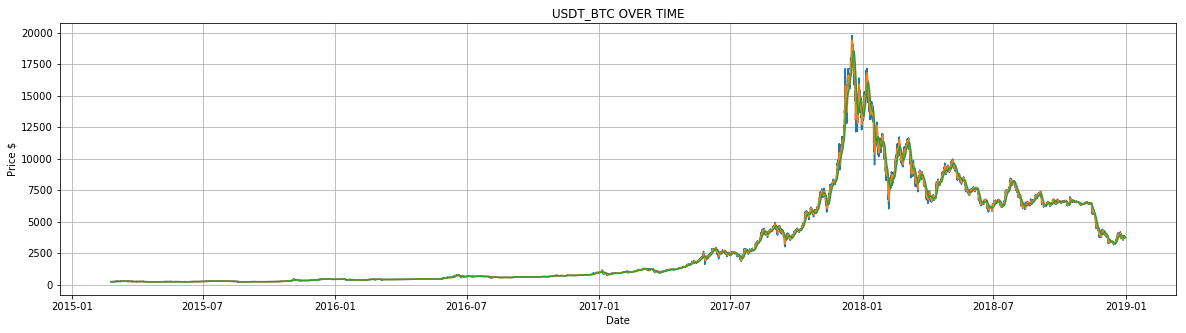

In [29]:
#Plot price and moving averages
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,5)) 
plt.plot(Daily_data_SMA['True Date'], Daily_data_SMA['close'])
plt.plot(Daily_data_SMA['True Date'], Daily_data_SMA['MA10'])
plt.plot(Daily_data_SMA['True Date'], Daily_data_SMA['MA50'])

# Incorporate the other graph properties
plt.title(f"{Symbol} OVER TIME")
plt.ylabel("Price $")
plt.xlabel("Date")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_vs_Wind.png")

# Show plot
plt.show()


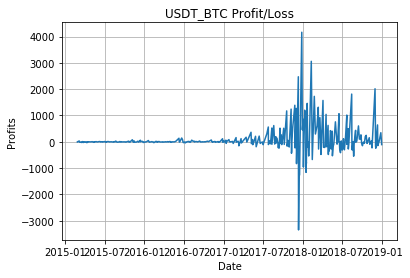

In [30]:
#Plot profit line
import matplotlib.pyplot as plt
plt.plot(EntryandExit['True Date'], EntryandExit['SMA Profit or Loss'])

# Incorporate the other graph properties
plt.title(f"{Symbol} Profit/Loss")
plt.ylabel("Profits")
plt.xlabel("Date")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_vs_Wind.png")

# Show plot
plt.show()

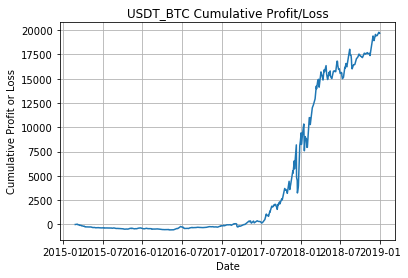

In [31]:
#Plot cummulative Profit /Loss
#Plot profit line
import matplotlib.pyplot as plt
plt.plot(EntryandExit['True Date'], EntryandExit['SMA Cumulative Profit or Loss'])

# Incorporate the other graph properties
plt.title(f"{Symbol} Cumulative Profit/Loss")
plt.ylabel("Cumulative Profit or Loss")
plt.xlabel("Date")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_vs_Wind.png")

# Show plot
plt.show()

Start of Second Strategy: Exponential Moving average

In [32]:
#drop the Nan to get to the start of the moving averages
Daily_data_EMA= Daily_data.dropna()

In [33]:
#create the long/short column:
def buy_sell (row):
   if row['EMA10'] > row['EMA50'] :
      return 'LONG'
   if row['EMA10'] < row['EMA50'] :
      return 'SHORT'    
longshort = Daily_data.apply (lambda row: buy_sell(row), axis=1)
Daily_data_EMA['EMA Go Long or Short'] = longshort

C:\Users\jthor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
#Find where the column values change
#this function compares current value to previous value and if they are the same = True
#If current value does not equal then it is false.
#Therefore all the "false" tags will have an exit price for our long and a entry price for our short
Daily_data_EMA['EMA entry and exit'] = Daily_data_EMA['EMA Go Long or Short'].eq(Daily_data_EMA['EMA Go Long or Short'].shift())
Daily_data_EMA.to_csv('ema_output.csv')
Daily_data_EMA

C:\Users\jthor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,close,date,high,low,open,quoteVolume,volume,weightedAverage,True Date,Year,MA10,MA50,EMA10,EMA50,EMA Go Long or Short,EMA entry and exit
49,235.000026,1424721600,235.000026,235.000026,235.000026,0.000000,0.000000,235.000026,2015-02-23 20:00:00,2015,235.000021,240.295046,235.603651,239.127936,SHORT,False
50,235.000000,1424728800,235.000000,235.000000,235.000000,0.011818,2.777235,235.000000,2015-02-23 22:00:00,2015,235.000021,240.495046,235.493892,238.941868,SHORT,True
51,235.000000,1424736000,235.000000,235.000000,235.000000,0.003995,0.938762,235.000000,2015-02-24 00:00:00,2015,235.000021,240.315046,235.404091,238.765223,SHORT,True
52,235.000000,1424743200,235.000000,235.000000,235.000000,0.000000,0.000000,235.000000,2015-02-24 02:00:00,2015,235.000018,240.135046,235.330618,238.597433,SHORT,True
53,235.000000,1424750400,235.000000,235.000000,235.000000,0.000000,0.000000,235.000000,2015-02-24 04:00:00,2015,235.000016,239.955046,235.270505,238.437973,SHORT,True
54,235.000000,1424757600,235.000000,235.000000,235.000000,0.000000,0.000000,235.000000,2015-02-24 06:00:00,2015,235.000013,239.775046,235.221321,238.286355,SHORT,True
55,235.000000,1424764800,235.000000,235.000000,235.000000,0.000000,0.000000,235.000000,2015-02-24 08:00:00,2015,235.000010,239.595046,235.181080,238.142129,SHORT,True
56,235.000000,1424772000,235.000000,235.000000,235.000000,0.000000,0.000000,235.000000,2015-02-24 10:00:00,2015,235.000008,239.490044,235.148156,238.004874,SHORT,True
57,238.000038,1424779200,238.000038,238.000038,238.000038,0.070491,16.776813,238.000038,2015-02-24 12:00:00,2015,235.300009,239.350045,235.666685,238.004663,SHORT,True
58,238.000038,1424786400,238.000038,238.000038,238.000038,0.000000,0.000000,238.000038,2015-02-24 14:00:00,2015,235.600010,239.305046,236.090934,238.004463,SHORT,True


In [35]:
#Lets pull out all the entry and exit points with closing price and Short or long column
EntryandExit = Daily_data_EMA.loc[Daily_data_EMA['EMA entry and exit'] == False]
EntryandExit
#NEXT Calculate the profit/Loss per trade
#Step 1 Change all the rows named SHORT to Negative
EntryandExit.loc[EntryandExit['EMA Go Long or Short'] == 'LONG', 'close'] = EntryandExit['close']*-1
#Calculate the profit or loss on the trades. Fist column will be nan after that the profit or 
#loss is calculated on a per trade basis

#EntryandExit['Running Total'] = EntryandExit['Profit or Loss'].cumsum()
EntryandExit['EMA Profit or Loss'] =  EntryandExit.close+EntryandExit.close.shift(1) 
#Cumulative Profit or loss
EntryandExit['EMA Cumulative Profit or Loss'] =  EntryandExit['EMA Profit or Loss'].cumsum()
EntryandExit.head(4)

C:\Users\jthor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jthor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,close,date,high,low,open,quoteVolume,volume,weightedAverage,True Date,Year,MA10,MA50,EMA10,EMA50,EMA Go Long or Short,EMA entry and exit,EMA Profit or Loss,EMA Cumulative Profit or Loss
49,235.000026,1424721600,235.000026,235.000026,235.000026,0.0,0.0,235.000026,2015-02-23 20:00:00,2015,235.000021,240.295046,235.603651,239.127936,SHORT,False,NaN,NaN
64,-239.750000,1424829600,239.750000,239.750000,239.750000,0.0,0.0,239.750000,2015-02-25 02:00:00,2015,237.925019,239.140048,238.218834,238.217226,LONG,False,-4.749974,-4.749974
71,237.750000,1424880000,237.750000,237.750000,237.750000,0.0,0.0,237.750000,2015-02-25 16:00:00,2015,238.950000,238.910048,238.270438,238.300523,SHORT,False,-2.000000,-6.749974
83,-239.800000,1424966400,239.800000,239.800000,239.800000,0.0,0.0,239.800000,2015-02-26 16:00:00,2015,238.160000,237.202048,238.474521,238.246384,LONG,False,-2.050000,-8.799974


In [36]:
#trade statistics
total_trades= len(EntryandExit)
Total_profit_points = EntryandExit['EMA Profit or Loss'].sum()
largest_drawdown = EntryandExit['EMA Profit or Loss'].min()
largest_winner = EntryandExit['EMA Profit or Loss'].max()

print(f"There were {total_trades} trades made for the Exponential Moving Average Strategy. The Total Profit/Loss from the \
strategy was ${round(Total_profit_points,2)}. The largest single winner was ${round(largest_winner,2)} and the largest drawdown was ${round(largest_drawdown,2)}")

There were 460 trades made for the Exponential Moving Average Strategy. The Total Profit/Loss from the strategy was $19912.18. The largest single winner was $3056.69 and the largest drawdown was $-2599.0


In [37]:
#Group by to get profit or loss per year
profit_by_year = EntryandExit[['Year','EMA Profit or Loss']]
profit_by_year.groupby(['Year']).sum()
#df1 = df[['a','b']]
#EntryandExit.groupby(['Year','SMA Cumulative Profit or Loss'])
#profit_by_year.sum()

,EMA Profit or Loss
Year,
2015,-701.373207
2016,11.595794
2017,10268.223232
2018,10333.736665


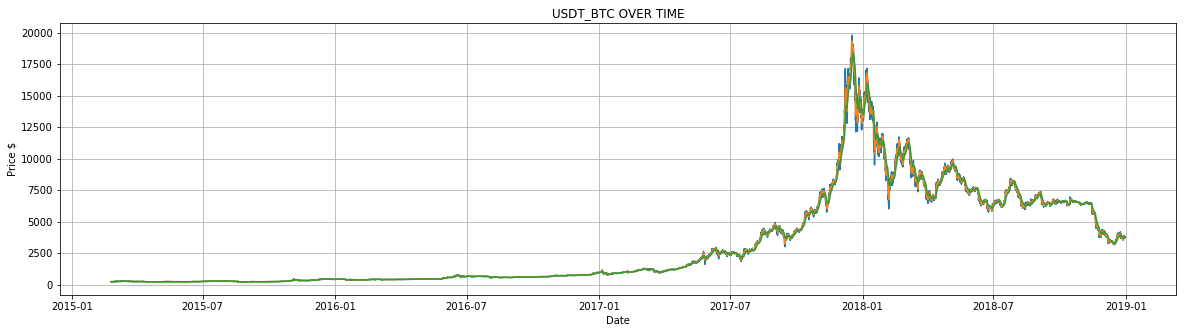

In [38]:
#Plot price and moving averages
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,5)) 
plt.plot(Daily_data_EMA['True Date'], Daily_data_EMA['close'])
plt.plot(Daily_data_EMA['True Date'], Daily_data_EMA['EMA10'])
plt.plot(Daily_data_EMA['True Date'], Daily_data_EMA['EMA50'])

# Incorporate the other graph properties
plt.title(f"{Symbol} OVER TIME")
plt.ylabel("Price $")
plt.xlabel("Date")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_vs_Wind.png")

# Show plot
plt.show()

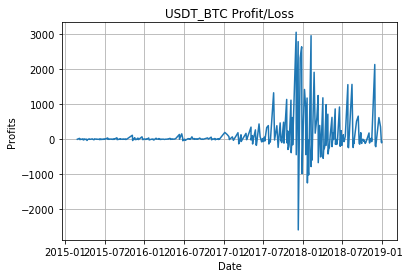

In [39]:
#Plot profit line
import matplotlib.pyplot as plt
plt.plot(EntryandExit['True Date'], EntryandExit['EMA Profit or Loss'])

# Incorporate the other graph properties
plt.title(f"{Symbol} Profit/Loss")
plt.ylabel("Profits")
plt.xlabel("Date")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_vs_Wind.png")

# Show plot
plt.show()

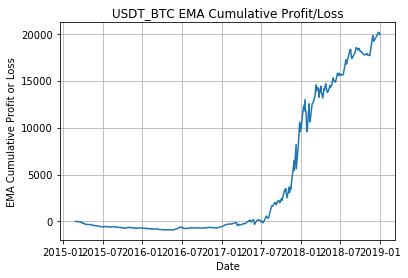

In [40]:
#Plot cummulative Profit /Loss
#Plot profit line
import matplotlib.pyplot as plt
plt.plot(EntryandExit['True Date'], EntryandExit['EMA Cumulative Profit or Loss'])

# Incorporate the other graph properties
plt.title(f"{Symbol} EMA Cumulative Profit/Loss")
plt.ylabel("EMA Cumulative Profit or Loss")
plt.xlabel("Date")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_vs_Wind.png")

# Show plot
plt.show()

In [ ]:
#import plotly_express as px
#gapminder = px.data.gapminder()
#gapminder2018 = gapminder.query('year == 2018 ')

#Daily_data_EMA and Daily_data_SMA merge on Date